<a href="https://colab.research.google.com/github/Fauzan-Al1/Deep_Learning/blob/main/RegresiUTStelkom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = '/content/RegresiUTSTelkom (1).csv'  # Update the path if needed
data = pd.read_csv(url)

In [3]:
data.dropna(inplace=True)

In [4]:
print(data.head())

   2001  49.94357  21.47114   73.0775   8.74861  -17.40628  -13.09905  \
0  2001  48.73215  18.42930  70.32679  12.94636  -10.32437  -24.83777   
1  2001  50.95714  31.85602  55.81851  13.41693   -6.57898  -18.54940   
2  2001  48.24750  -1.89837  36.29772   2.58776    0.97170  -26.21683   
3  2001  50.97020  42.20998  67.09964   8.46791  -15.85279  -16.81409   
4  2001  50.54767   0.31568  92.35066  22.38696  -25.51870  -19.04928   

   -25.01202  -12.23257   7.83089  ...   13.0162  -54.40548  58.99367  \
0    8.76630   -0.92019  18.76548  ...   5.66812  -19.68073  33.04964   
1   -3.27872   -2.35035  16.07017  ...   3.03800   26.05866 -50.92779   
2    5.05097  -10.34124   3.55005  ...  34.57337 -171.70734 -16.96705   
3  -12.48207   -9.37636  12.63699  ...   9.92661  -55.95724  64.92712   
4   20.67345   -5.19943   3.63566  ...   6.59753  -50.69577  26.02574   

   15.37344   1.11144  -23.08793   68.40795  -1.82223  -27.46348   2.26327  
0  42.87836  -9.90378  -32.22788   70.49388  

In [5]:
data.columns = ['Year', 'Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5',
                'Feature6', 'Feature7', 'Feature8', 'Feature9', 'Feature10', 'Feature11',
                'Feature12', 'Feature13', 'Feature14', 'Feature15', 'Feature16', 'Feature17',
                'Feature18', 'Feature19', 'Feature20', 'Feature21', 'Feature22', 'Feature23',
                'Feature24', 'Feature25', 'Feature26', 'Feature27', 'Feature28', 'Feature29',
                'Feature30', 'Feature31', 'Feature32', 'Feature33', 'Feature34', 'Feature35',
                'Feature36', 'Feature37', 'Feature38', 'Feature39', 'Feature40', 'Feature41',
                'Feature42', 'Feature43', 'Feature44', 'Feature45', 'Feature46', 'Feature47',
                'Feature48', 'Feature49', 'Feature50', 'Feature51', 'Feature52', 'Feature53',
                'Feature54', 'Feature55', 'Feature56', 'Feature57', 'Feature58', 'Feature59',
                'Feature60', 'Feature61', 'Feature62', 'Feature63', 'Feature64', 'Feature65',
                'Feature66', 'Feature67', 'Feature68', 'Feature69', 'Feature70', 'Feature71',
                'Feature72', 'Feature73', 'Feature74', 'Feature75', 'Feature76', 'Feature77',
                'Feature78', 'Feature79', 'Feature80', 'Feature81', 'Feature82', 'Feature83',
                'Feature84', 'Feature85', 'Feature86', 'Feature87', 'Feature88', 'Feature89',
                'Feature90']

In [6]:
data = data.drop(columns=['Year'])

In [7]:
print(data.head())

   Feature1  Feature2  Feature3  Feature4  Feature5  Feature6  Feature7  \
0  48.73215  18.42930  70.32679  12.94636 -10.32437 -24.83777   8.76630   
1  50.95714  31.85602  55.81851  13.41693  -6.57898 -18.54940  -3.27872   
2  48.24750  -1.89837  36.29772   2.58776   0.97170 -26.21683   5.05097   
3  50.97020  42.20998  67.09964   8.46791 -15.85279 -16.81409 -12.48207   
4  50.54767   0.31568  92.35066  22.38696 -25.51870 -19.04928  20.67345   

   Feature8  Feature9  Feature10  ...  Feature81  Feature82  Feature83  \
0  -0.92019  18.76548    4.59210  ...    5.66812  -19.68073   33.04964   
1  -2.35035  16.07017    1.39518  ...    3.03800   26.05866  -50.92779   
2 -10.34124   3.55005   -6.36304  ...   34.57337 -171.70734  -16.96705   
3  -9.37636  12.63699    0.93609  ...    9.92661  -55.95724   64.92712   
4  -5.19943   3.63566   -4.69088  ...    6.59753  -50.69577   26.02574   

   Feature84  Feature85  Feature86  Feature87  Feature88  Feature89  Feature90  
0   42.87836   -9.90378

In [8]:
X = data.drop(columns=['Feature90'])
y = data['Feature90']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
X_train_scaled = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_scaled = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(128, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
history = model.fit(X_train_scaled, y_train, epochs=15, validation_split=0.2, batch_size=32)

Epoch 1/15
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 192s 18ms/step - loss: 325.3961 - mae: 12.0684 - val_loss: 219.6448 - val_mae: 10.2426
Epoch 2/15
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 174s 17ms/step - loss: 208.1267 - mae: 9.9748 - val_loss: 189.6067 - val_mae: 9.5338
Epoch 3/15
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 211s 18ms/step - loss: 183.1679 - mae: 9.4315 - val_loss: 175.5070 - val_mae: 9.2042
Epoch 4/15
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 175s 17ms/step - loss: 168.7850 - mae: 9.1433 - val_loss: 179.0227 - val_mae: 9.3491
Epoch 5/15
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 202s 17ms/step - loss: 158.2749 - mae: 8.9152 - val_loss: 165.0082 - val_mae: 8.9343
Epoch 6/15
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 201s 17ms/step - loss: 151.1273 - mae: 8.7393 - val_loss: 166.9159 - val_mae: 8.9850
Epoch 7/15
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 202s 17ms/step - loss: 146.6973 - mae: 8.6272 - val_loss: 160.8042 - val_mae: 8.8307
Epoch 8/15
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 174s 17ms/step - loss: 141.6586 - mae: 8.5087 - val

In [14]:
y_pred = model.predict(X_test_scaled)

3221/3221 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step


In [15]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-Squared: {r_squared}")

Mean Squared Error (MSE): 160.41745228127388
Root Mean Squared Error (RMSE): 12.665601141725325
R-Squared: 0.6706033116585812


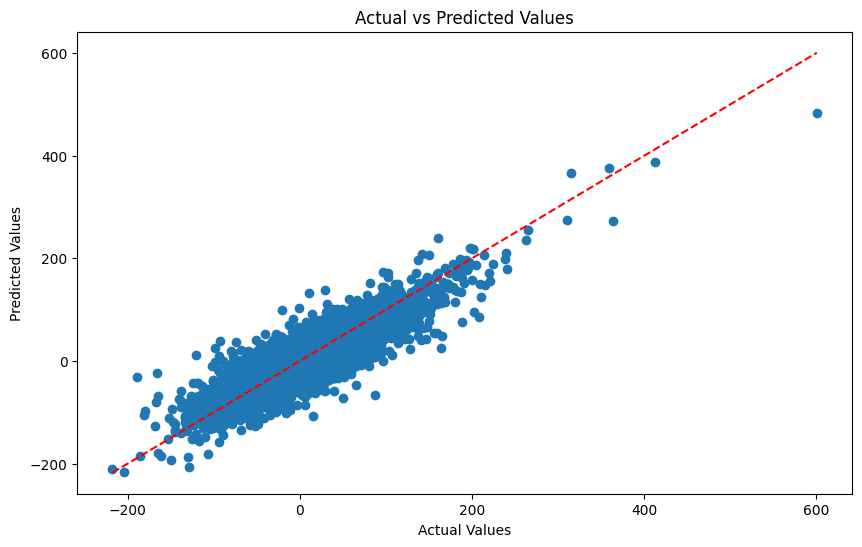

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

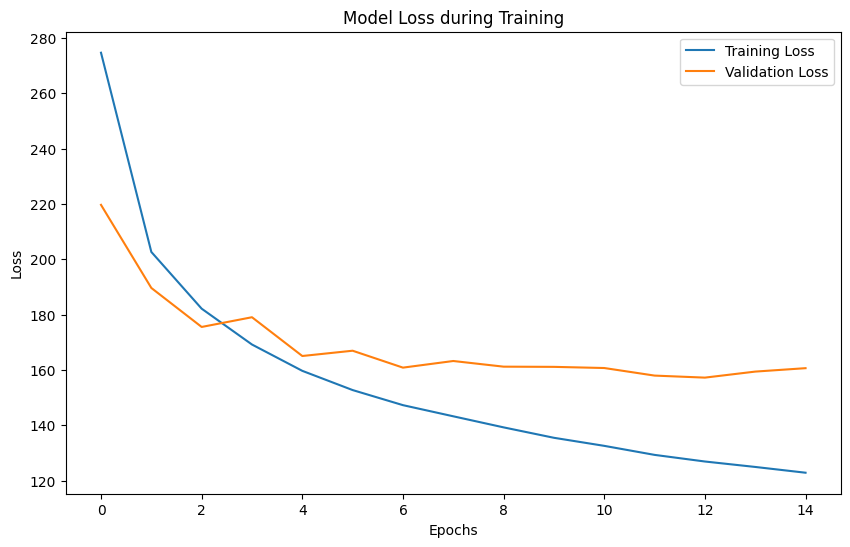

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss during Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
y_test_class = (y_test > 0.5).astype(int)

y_pred_class = (y_pred > 0.5).astype(int)

In [19]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

accuracy = accuracy_score(y_test_class, y_pred_class)
precision = precision_score(y_test_class, y_pred_class)
recall = recall_score(y_test_class, y_pred_class)
f1 = f1_score(y_test_class, y_pred_class)

roc_auc = roc_auc_score(y_test_class, y_pred)

# Print Classification Metrics
print(f"Classification Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC-AUC: {roc_auc}")

Classification Metrics:
Accuracy: 0.7651282150792188
Precision: 0.7692084241103849
Recall: 0.7391191658193274
F1-Score: 0.753863673336587
ROC-AUC: 0.8412338471969711


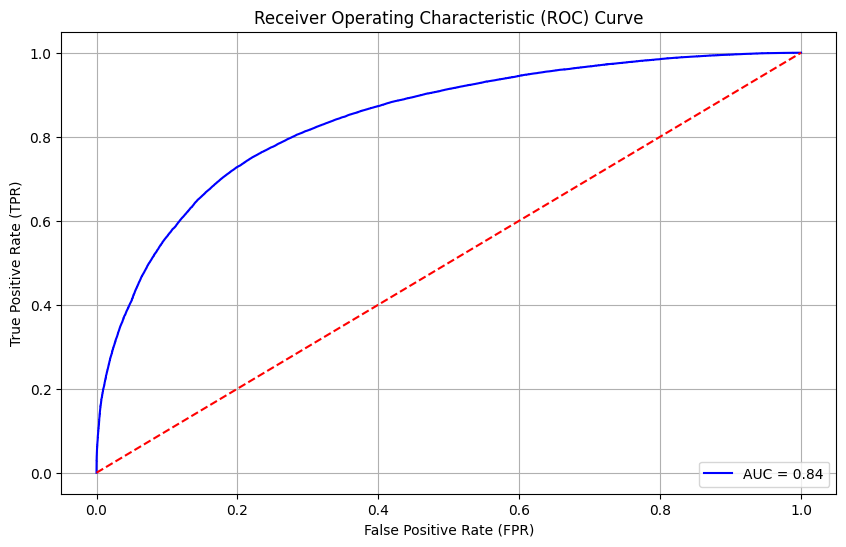

In [20]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

fpr, tpr, thresholds = roc_curve(y_test_class, y_pred)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

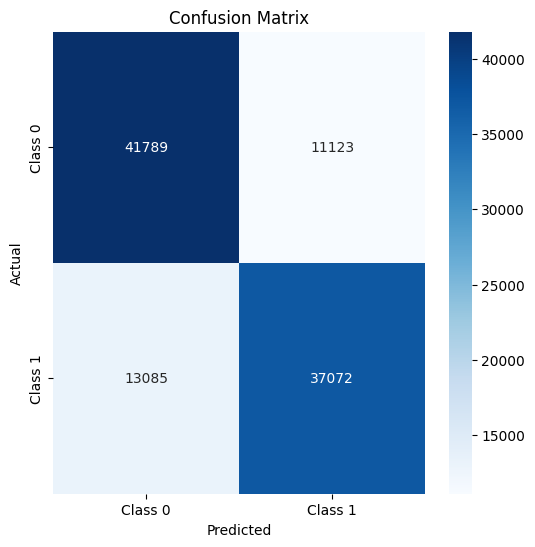

In [21]:
cm = confusion_matrix(y_test_class, y_pred_class)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()